<a href="https://colab.research.google.com/github/ssmyousuf/genai_notes/blob/master/RANDOMFOREST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!unzip ford.zip

Archive:  ford.zip
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


Import data and libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

Import Data

In [12]:
#Load the training data
train = pd.read_csv("/content/fordTrain.csv")
#Load the test data
test = pd.read_csv("/content/fordTest.csv")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [14]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [16]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [17]:
train.shape

(604329, 33)

In [18]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [19]:
train.skew(numeric_only=True)

,0
TrialID,0.024138
ObsNum,0.000214
IsAlert,-0.319185
P1,2.445986
P2,0.863450
P3,0.507984
P4,0.643117
P5,20.225034
P6,89.789752
P7,1.937124


<Axes: >

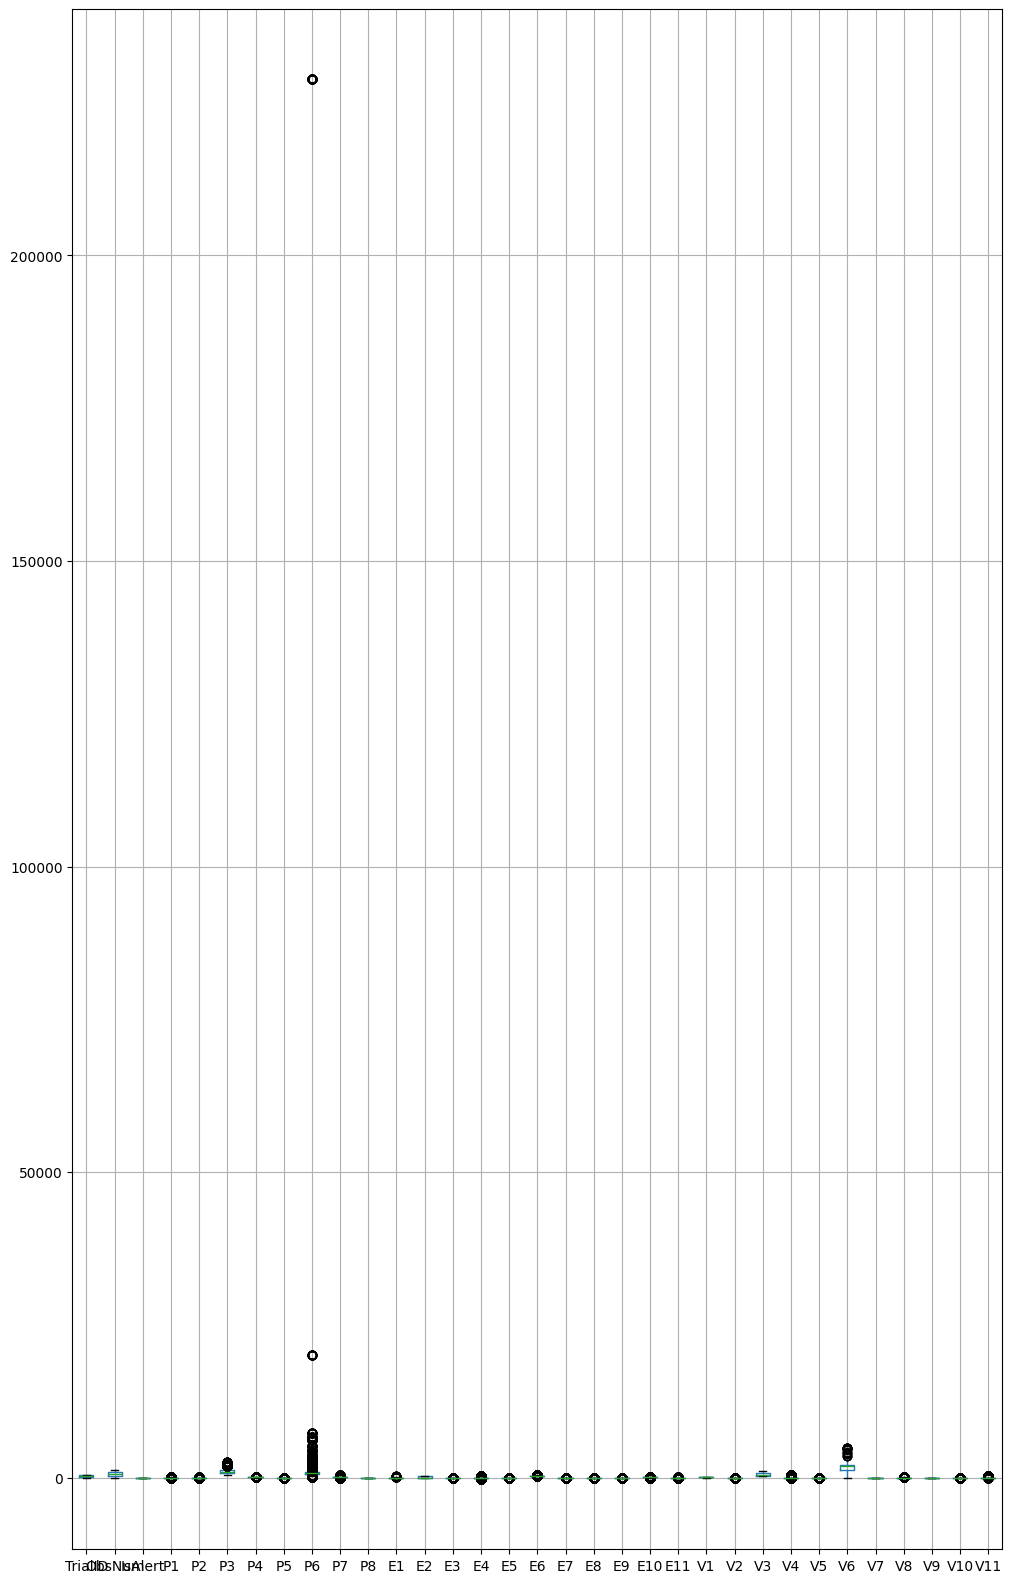

In [20]:
train.boxplot(figsize=(12,20))

<Axes: >

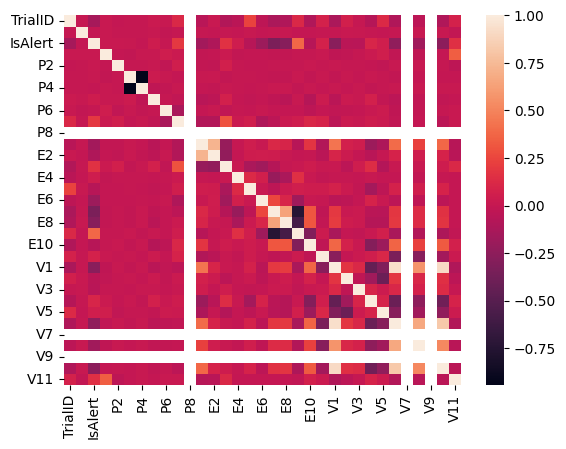

In [21]:
sns.heatmap(train.corr())

Model implementation

In [22]:
x = train.iloc[:,3:]
y = train['IsAlert']

In [23]:
print(x.shape)
print(y.shape)

(604329, 30)
(604329,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(483463, 30)
(483463,)
(120866, 30)
(120866,)


In [26]:
def model_eval(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  print(cm)
  print(classification_report(actual, predicted))
  accu = accuracy_score(actual, predicted)
  print('Accuracy', accu)


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
prod_lr_predict_train = lr.predict(x_train)
prod_lr_predict_test = lr.predict(x_test)
model_eval(y_train, prod_lr_predict_train)
model_eval(y_test, prod_lr_predict_test)

[[129103  74463]
 [ 66195 213702]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65    203566
           1       0.74      0.76      0.75    279897

    accuracy                           0.71    483463
   macro avg       0.70      0.70      0.70    483463
weighted avg       0.71      0.71      0.71    483463

Accuracy 0.7090615000527445
[[32258 18720]
 [16603 53285]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65     50978
           1       0.74      0.76      0.75     69888

    accuracy                           0.71    120866
   macro avg       0.70      0.70      0.70    120866
weighted avg       0.71      0.71      0.71    120866

Accuracy 0.7077507322158424


Decission Tree

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
prod_dtree_predict_train = dtree.predict(x_train)
prod_dtree_predict_test = dtree.predict(x_test)
model_eval(y_train, prod_dtree_predict_train)
model_eval(y_test, prod_dtree_predict_test)

[[203566      0]
 [     0 279897]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203566
           1       1.00      1.00      1.00    279897

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy 1.0
[[50178   800]
 [  720 69168]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     50978
           1       0.99      0.99      0.99     69888

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866

Accuracy 0.9874240894875317


In [30]:
rft = RandomForestClassifier(verbose=2, n_estimators=15)
rft.fit(x_train, y_train)
prod_rft_predict_train = rft.predict(x_train)
prod_rft_predict_test = rft.predict(x_test)
model_eval(y_train, prod_rft_predict_train)
model_eval(y_test, prod_rft_predict_test)

building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   44.0s finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.3s finished


[[203533     33]
 [     1 279896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203566
           1       1.00      1.00      1.00    279897

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy 0.9999296740391715
[[50247   731]
 [   96 69792]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50978
           1       0.99      1.00      0.99     69888

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866

Accuracy 0.9931577118461767


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished


In [31]:
import pickle

In [32]:
with open('my_model.pkl', 'wb') as f:
    pickle.dump(rft, f)

Model with PCA

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)

In [34]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [35]:
x_train_pca

array([[-1.19626380e+02, -1.00764854e+03,  3.25201873e+02, ...,
         1.61945716e+00,  2.91861599e+00, -8.01614326e-01],
       [ 4.74973747e+01,  1.68190045e+02, -3.58760835e+02, ...,
         9.59333925e-01, -5.73177590e+00, -6.85915221e-01],
       [ 2.67055357e+02,  4.51239106e+02,  5.80929070e+02, ...,
         1.45507663e+01, -4.90570645e+00, -1.01974485e+00],
       ...,
       [ 2.15973670e+02,  1.66213505e+02, -9.04531110e+01, ...,
         5.66382897e+00,  2.50728058e+01, -6.72042455e+00],
       [-6.87487970e+01,  2.75023500e+02, -1.04902701e+02, ...,
         2.97728101e+00,  7.60866524e+00,  5.51199308e+00],
       [-2.52495908e+02,  2.32685119e+02, -4.90658068e+01, ...,
        -5.68074866e+00,  4.00010718e+00, -6.25587324e-01]])

In [39]:
pca.explained_variance_ratio_

array([9.18079691e-01, 5.33753615e-02, 1.32779408e-02, 1.21260868e-02,
       2.23710677e-03, 4.53679513e-04, 1.75165007e-04, 1.02835024e-04,
       5.00073787e-05, 3.97387677e-05, 3.04492555e-05, 1.45873747e-05,
       9.97822270e-06, 9.00975839e-06, 6.02226245e-06])

In [40]:
lr_pca = LogisticRegression()
lr_pca.fit(x_train_pca, y_train)

LogisticRegression()

In [41]:
lr_pca_predict_train = lr_pca.predict(x_train_pca)
lr_pca_predict_test = lr_pca.predict(x_test_pca)

In [42]:
model_eval(y_train, lr_pca_predict_train)
model_eval(y_test, lr_pca_predict_test)

[[158632  44934]
 [101759 178138]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68    203566
           1       0.80      0.64      0.71    279897

    accuracy                           0.70    483463
   macro avg       0.70      0.71      0.70    483463
weighted avg       0.72      0.70      0.70    483463

Accuracy 0.6965786420056964
[[39691 11287]
 [25465 44423]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68     50978
           1       0.80      0.64      0.71     69888

    accuracy                           0.70    120866
   macro avg       0.70      0.71      0.70    120866
weighted avg       0.72      0.70      0.70    120866

Accuracy 0.6959277216090547


In [45]:
dtree_pca = DecisionTreeClassifier(max_depth=5)
dtree_pca.fit(x_train_pca, y_train)
dtree_pca_predict_train = dtree_pca.predict(x_train_pca)
dtree_pca_predict_test = dtree_pca.predict(x_test_pca)

In [46]:
model_eval(y_train, dtree_pca_predict_train)
model_eval(y_test, dtree_pca_predict_test)

[[135136  68430]
 [ 39873 240024]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71    203566
           1       0.78      0.86      0.82    279897

    accuracy                           0.78    483463
   macro avg       0.78      0.76      0.76    483463
weighted avg       0.78      0.78      0.77    483463

Accuracy 0.7759849254234553
[[33915 17063]
 [10018 59870]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71     50978
           1       0.78      0.86      0.82     69888

    accuracy                           0.78    120866
   macro avg       0.78      0.76      0.77    120866
weighted avg       0.78      0.78      0.77    120866

Accuracy 0.7759419522446346


In [47]:
rfc_pca = RandomForestClassifier(verbose=2, n_estimators=15)
rfc_pca.fit(x_train_pca, y_train)
rfc_pca_predict_train = rfc_pca.predict(x_train_pca)
rfc_pca_predict_test = rfc_pca.predict(x_test_pca)
model_eval(y_train, rfc_pca_predict_train)
model_eval(y_test, rfc_pca_predict_test)

building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.1s finished


[[203469     97]
 [    14 279883]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203566
           1       1.00      1.00      1.00    279897

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy 0.9997704064220013
[[49532  1446]
 [  481 69407]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     50978
           1       0.98      0.99      0.99     69888

    accuracy                           0.98    120866
   macro avg       0.98      0.98      0.98    120866
weighted avg       0.98      0.98      0.98    120866

Accuracy 0.9840567239753115


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
